In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn import metrics

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base import  datetools
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline

In [3]:
xgr = XGBRegressor(n_estimators=1000)
las = Lasso()
rid = Ridge()
en = ElasticNet()
lr = LinearRegression()
lgbm = LGBMRegressor()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
l = [xgr,lr,las,rid,dt,rf,lgbm]

In [4]:
data = pd.read_csv('HPIpredictionfinal1.csv',parse_dates=['DATE'], index_col='DATE')
data

,HPI,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,PERMIT,NEW_HOMES,DELINQUENCY,Men Married1,...,Men Unmarried Widowed,Women Married1,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants,date,quarter,month,year,weekofyear
DATE,,,,,,,,,,,,,,,,,,,,,
1987-01-01,63.962,4722.156,6.6,85.4651,3831.4,241857.0,1690.0,1774.0,3.18,55833.0,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-01-01,1,1,1987,1
1987-02-01,64.422,4722.156,6.6,85.4651,3858.1,242005.0,1689.0,1784.0,3.18,55833.0,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-02-01,1,2,1987,5
1987-03-01,64.733,4806.160,6.6,86.3612,3878.4,242166.0,1704.0,1726.0,3.18,55833.0,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-03-01,1,3,1987,9
1987-04-01,65.129,4806.160,6.3,86.3612,3891.1,242338.0,1601.0,1614.0,3.18,55833.0,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-04-01,2,4,1987,14
1987-05-01,65.563,4806.160,6.3,86.3612,3925.0,242516.0,1500.0,1628.0,3.18,55833.0,...,2333.0,56797.0,8845.0,11477.0,599889.0,1987-05-01,2,5,1987,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,267.183,23202.344,5.2,153.8611,20916.3,332295.0,1721.0,1573.0,2.30,67544.0,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-08-01,3,8,2021,30
2021-09-01,270.225,24008.472,4.7,153.8611,20719.8,332403.0,1586.0,1550.0,2.33,67544.0,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-09-01,3,9,2021,35
2021-10-01,272.976,24008.472,4.6,153.8611,20843.1,332513.0,1653.0,1552.0,2.33,67544.0,...,3582.0,68331.0,15085.0,11612.0,1031765.0,2021-10-01,4,10,2021,39


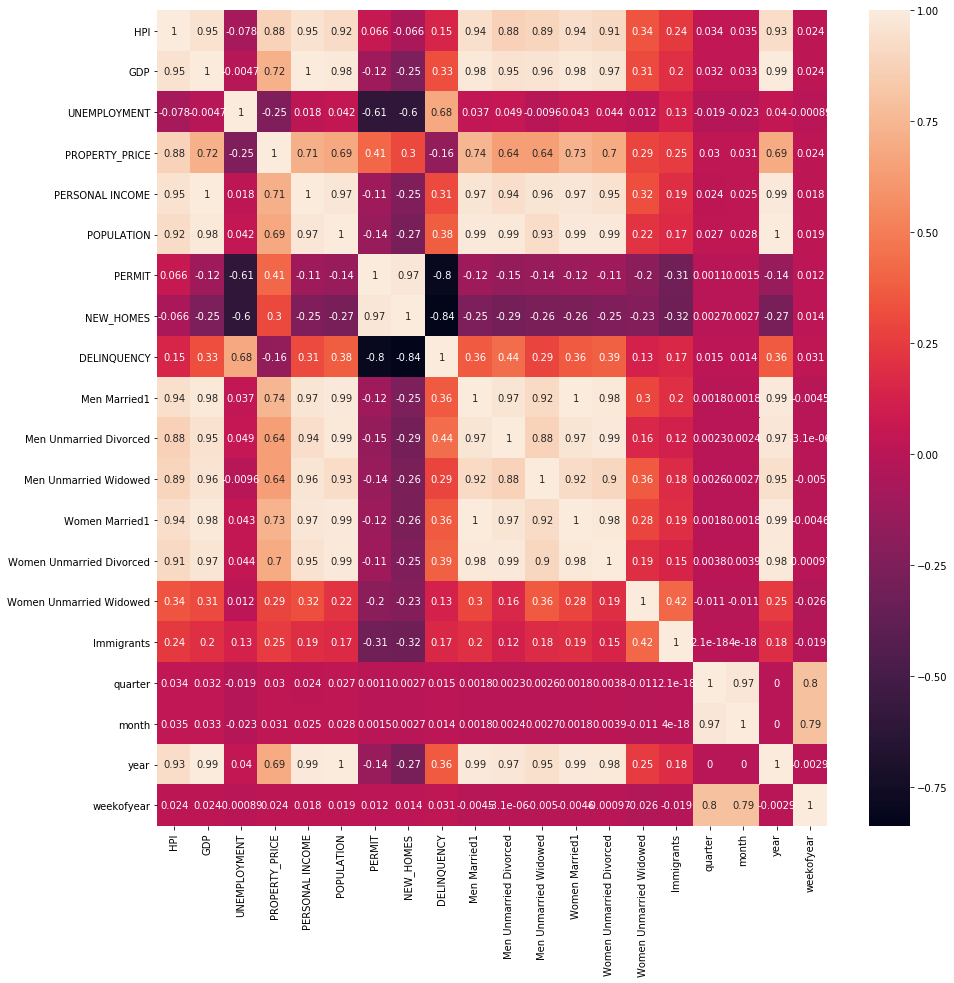

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [88]:
#df = pd.read_csv('HPIpredictionfinal1.csv',parse_dates=['DATE'], index_col='DATE')

In [89]:
df.columns

Index(['HPI', 'GDP', 'UNEMPLOYMENT', 'PROPERTY_PRICE', 'PERSONAL INCOME',
       'POPULATION', 'PERMIT', 'NEW_HOMES', 'DELINQUENCY', 'Men Married1',
       'Men Unmarried Divorced', 'Men Unmarried Widowed', 'Women Married1',
       'Women Unmarried Divorced', 'Women Unmarried Widowed', 'Immigrants',
       'date', 'quarter', 'month', 'year', 'weekofyear'],
      dtype='object')

In [5]:
#data.drop(['DATE'],axis=1,inplace=True)
X = data.drop(['HPI','date'],axis=1)
y = data['HPI']
#train-test split (80/20)
#training on data till 2014
#infernece on data after 2014
X_train = X.iloc[0:336]
y_train = y.iloc[0:336]
X_test = X.iloc[336:420]
y_test = y.iloc[336:420]

In [6]:
X_train.head()

,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,PERMIT,NEW_HOMES,DELINQUENCY,Men Married1,Men Unmarried Divorced,Men Unmarried Widowed,Women Married1,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants,quarter,month,year,weekofyear
DATE,,,,,,,,,,,,,,,,,,,
1987-01-01,4722.156,6.6,85.4651,3831.4,241857.0,1690.0,1774.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0,1,1,1987,1
1987-02-01,4722.156,6.6,85.4651,3858.1,242005.0,1689.0,1784.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0,1,2,1987,5
1987-03-01,4806.160,6.6,86.3612,3878.4,242166.0,1704.0,1726.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0,1,3,1987,9
1987-04-01,4806.160,6.3,86.3612,3891.1,242338.0,1601.0,1614.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0,2,4,1987,14
1987-05-01,4806.160,6.3,86.3612,3925.0,242516.0,1500.0,1628.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0,2,5,1987,18


In [196]:
l

[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              importance_type='gain', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
              n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1),
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
            max_iter=1000, normalize=False, positive=False, precompute=False,
            random_state

In [200]:
X_train

,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,PERMIT,NEW_HOMES,DELINQUENCY,Men Married1,Men Unmarried Divorced,Men Unmarried Widowed,Women Married1,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants,quarter,month,year,weekofyear
DATE,,,,,,,,,,,,,,,,,,,
1987-01-01,4722.156,6.6,85.4651,3831.4,241857.0,1690.0,1774.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0,1,1,1987,1
1987-02-01,4722.156,6.6,85.4651,3858.1,242005.0,1689.0,1784.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0,1,2,1987,5
1987-03-01,4806.160,6.6,86.3612,3878.4,242166.0,1704.0,1726.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0,1,3,1987,9
1987-04-01,4806.160,6.3,86.3612,3891.1,242338.0,1601.0,1614.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0,2,4,1987,14
1987-05-01,4806.160,6.3,86.3612,3925.0,242516.0,1500.0,1628.0,3.18,55833.0,6283.0,2333.0,56797.0,8845.0,11477.0,599889.0,2,5,1987,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,17743.227,6.1,109.2950,15105.5,319919.0,1047.0,984.0,6.95,65853.0,10729.0,3059.0,66732.0,14614.0,11214.0,1016518.0,3,8,2014,31
2014-09-01,17852.540,5.9,111.8098,15166.0,320166.0,1077.0,1023.0,6.71,65853.0,10729.0,3059.0,66732.0,14614.0,11214.0,1016518.0,3,9,2014,36
2014-10-01,17852.540,5.7,111.8098,15233.2,320403.0,1094.0,1074.0,6.71,65853.0,10729.0,3059.0,66732.0,14614.0,11214.0,1016518.0,4,10,2014,40


In [ ]:
#lets remove multicolinearity from data. We'll remove features that have obvious linear relationship.

In [203]:
for i in l:
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print(f'MAE & RMSE: ',metrics.mean_absolute_error(y_test,pred).mean(), np.sqrt(metrics.mean_squared_error(y_test,pred)))

[19:51:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE & RMSE:  29.699176586332772 41.529194193787504
MAE & RMSE:  14.442577632068597 22.68492159826251
MAE & RMSE:  12.047740717215103 17.98736793366882
MAE & RMSE:  13.632722454509947 22.21287524414101
MAE & RMSE:  31.245869047619035 42.39564907581345


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1714.4096568386694, tolerance: 48.980663241899705
  positive)


MAE & RMSE:  32.73166916666668 43.60346889015852
MAE & RMSE:  30.837780604217155 41.96926040963993


In [90]:
df = pd.read_csv('HPIpredictionfinal2.csv')

In [91]:
df

,HPI,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,PERMIT,NEW_HOMES,DELINQUENCY,Men Married1,Men Unmarried Divorced,Men Unmarried Widowed,Women Married1,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants
0,63.962,4722.156,6.6,85.4651,3831.4,241857.0,1690.0,1774.0,3.18,57068.0,9633.0,2697.0,66287.0,13308.0,10944.0,599889.0
1,64.422,4722.156,6.6,85.4651,3858.1,242005.0,1689.0,1784.0,3.18,65369.0,9633.0,2569.0,63901.0,14434.0,11642.0,599889.0
2,64.733,4806.160,6.6,86.3612,3878.4,242166.0,1704.0,1726.0,3.18,64842.0,9633.0,3469.0,65202.0,8845.0,11214.0,599889.0
3,65.129,4806.160,6.3,86.3612,3891.1,242338.0,1601.0,1614.0,3.18,66695.0,9958.0,3479.0,65604.0,14434.0,11408.0,599889.0
4,65.563,4806.160,6.3,86.3612,3925.0,242516.0,1500.0,1628.0,3.18,65281.0,9958.0,3124.0,66287.0,11116.0,11225.0,599889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,267.183,23202.344,5.2,153.8611,20916.3,332295.0,1721.0,1573.0,2.30,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1016518.0
416,270.225,23992.355,4.7,153.8611,20719.8,332403.0,1586.0,1550.0,2.33,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1058902.0
417,272.976,24008.472,4.6,153.8611,20843.1,332513.0,1653.0,1552.0,2.33,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1122257.0
418,276.189,23992.355,4.2,153.8611,20960.5,332598.0,1717.0,1703.0,2.33,67544.0,10824.0,3582.0,68331.0,15085.0,11612.0,1058902.0


In [92]:
#xgr = XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42)
las = Lasso()
rid = Ridge()
en = ElasticNet()
lr = LinearRegression()
lgbm = LGBMRegressor()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
l = [lr,las,rid,dt,rf,lgbm]

In [93]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [124]:
X = df.drop('HPI',axis=1)
y = df['HPI']

for i in l:
    print(-1 * cross_val_score(pipeline.Pipeline([('transformer', scaler), ('regressor', i)]),X,y,scoring='neg_mean_absolute_error',cv =5).mean())
    print(-1 * cross_val_score(pipeline.Pipeline([('transformer', scaler), ('regressor', i)]),X,y,scoring='neg_root_mean_squared_error',cv =5).mean())

11.46813786840397
13.466255616765315
5.353537101928437
6.846930737764611
9.052235409740279
10.537113883992877
15.856104761904765
21.721652902650654
17.661120976190503
21.697466574636017
14.711384388587831
18.897397065181003


In [79]:
print(-1 * cross_val_score(pipeline.Pipeline([('transformer', scaler), ('regressor', xgr)]),X,y,scoring='neg_root_mean_squared_error',cv =5).mean())
print(-1 * cross_val_score(pipeline.Pipeline([('transformer', scaler), ('regressor', xgr)]),X,y,scoring='neg_mean_absolute_error',cv =5).mean())

[12:33:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:33:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
18.57509160425783
[12:33:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror

Final model - Lasso Regression. We'll use to eaxplain the degree of relationship between differnt factors and House Price Index.

In [95]:
X_scaled = scaler.fit_transform(X)

In [96]:
las.fit(X_scaled,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
rid.fit(X_scaled,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [105]:
lr.fit(X_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
X.columns

Index(['GDP', 'UNEMPLOYMENT', 'PROPERTY_PRICE', 'PERSONAL INCOME',
       'POPULATION', 'PERMIT', 'NEW_HOMES', 'DELINQUENCY', 'Men Married1',
       'Men Unmarried Divorced', 'Men Unmarried Widowed', 'Women Married1',
       'Women Unmarried Divorced', 'Women Unmarried Widowed', 'Immigrants'],
      dtype='object')

In [97]:
las.coef_

array([16.40060701,  0.        , 21.00841408, 15.8614092 ,  0.        ,
       -0.        , -0.59466416,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.26725638,  0.        ])

In [108]:
lr.coef_

array([ 44.96170676,   2.07258083,  24.93149238,   1.56581061,
       -13.38125282,  -4.59068909,  -1.14845287,  -3.19521804,
        -0.90751213,  -0.83244582,  -0.59118686,  -0.67727814,
         0.04826647,   0.10901019,  -1.6030512 ])

In [101]:
X.columns

Index(['GDP', 'UNEMPLOYMENT', 'PROPERTY_PRICE', 'PERSONAL INCOME',
       'POPULATION', 'PERMIT', 'NEW_HOMES', 'DELINQUENCY', 'Men Married1',
       'Men Unmarried Divorced', 'Men Unmarried Widowed', 'Women Married1',
       'Women Unmarried Divorced', 'Women Unmarried Widowed', 'Immigrants'],
      dtype='object')

In [111]:
eli5.show_weights(las, feature_names = X.columns.tolist())

Weight?,Feature
+133.985,<BIAS>
+21.008,PROPERTY_PRICE
+16.401,GDP
+15.861,PERSONAL INCOME
+0.267,Women Unmarried Widowed
-0.595,NEW_HOMES


In [119]:
eli5.show_weights(rid, feature_names = X.columns.tolist())

Weight?,Feature
+133.985,<BIAS>
+26.768,GDP
+25.545,PROPERTY_PRICE
+11.832,PERSONAL INCOME
+1.063,UNEMPLOYMENT
+0.344,Women Unmarried Widowed
-0.033,Women Unmarried Divorced
-0.071,Men Unmarried Widowed
-0.422,Women Married1
-0.732,Men Married1


Feature: 0, Score: 16.40061
Feature: 1, Score: 0.00000
Feature: 2, Score: 21.00841
Feature: 3, Score: 15.86141
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.59466
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.26726
Feature: 14, Score: 0.00000


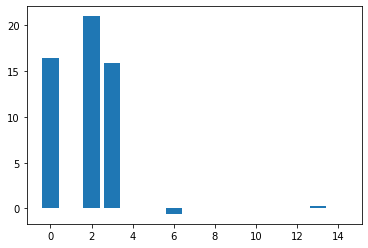

In [114]:
importance = las.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [121]:
for j,i in enumerate(X.columns):
    print(j,i)

0 GDP
1 UNEMPLOYMENT
2 PROPERTY_PRICE
3 PERSONAL INCOME
4 POPULATION
5 PERMIT
6 NEW_HOMES
7 DELINQUENCY
8 Men Married1
9 Men Unmarried Divorced
10 Men Unmarried Widowed
11 Women Married1
12 Women Unmarried Divorced
13 Women Unmarried Widowed
14 Immigrants


Feature: 0, Score: 26.76800
Feature: 1, Score: 1.06252
Feature: 2, Score: 25.54465
Feature: 3, Score: 11.83233
Feature: 4, Score: -6.71397
Feature: 5, Score: -4.86517
Feature: 6, Score: -1.03052
Feature: 7, Score: -2.50928
Feature: 8, Score: -0.73214
Feature: 9, Score: -0.97781
Feature: 10, Score: -0.07079
Feature: 11, Score: -0.42175
Feature: 12, Score: -0.03301
Feature: 13, Score: 0.34422
Feature: 14, Score: -1.57289


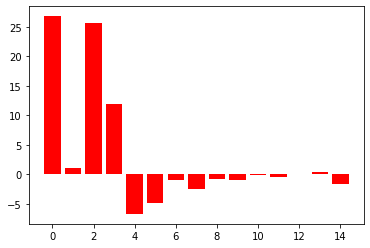

In [120]:
importance = rid.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
barr = plt.bar([x for x in range(len(importance))], importance,color = 'red')
plt.show()